# Support Vector Regression

# Non- linear salaries, 

# Identifying if employee is saying truth or bluff ?

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [67]:
df = pd.read_csv("Position_Salaries.csv")

In [68]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [69]:
X=df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [70]:
from sklearn.svm import SVR

In [71]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
y_pred = regressor.predict(6.5)

In [73]:
y_pred

array([130001.55760156])

In [74]:
# Plot

Text(0,0.5,'Salaries')

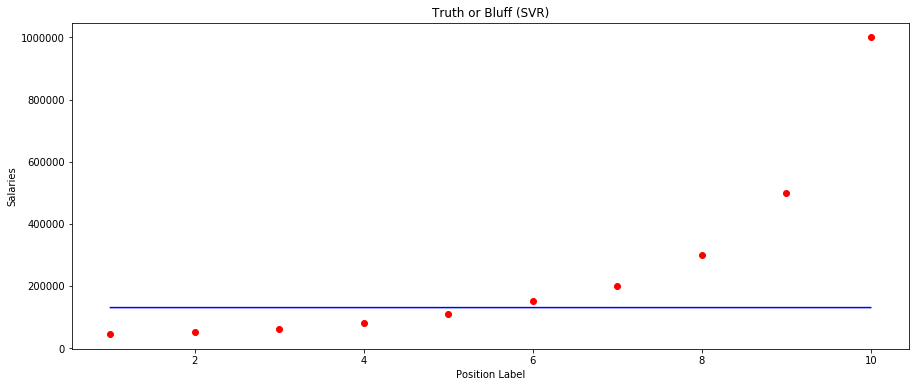

In [75]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color ='blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Label")
plt.ylabel("Salaries")

In [76]:
# This is because of not implementing Feature scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [80]:
y_pred

array([170370.0204065])

Text(0,0.5,'Salaries')

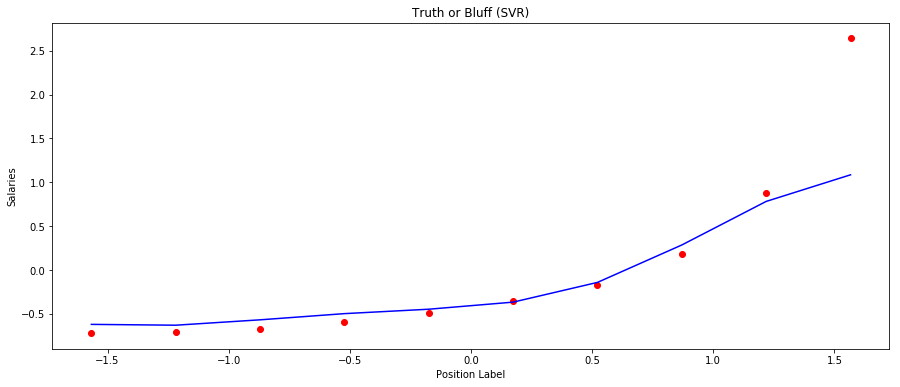

In [81]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color ='blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Label")
plt.ylabel("Salaries")

In [82]:
#Smoothening the curve

Text(0,0.5,'Salaries')

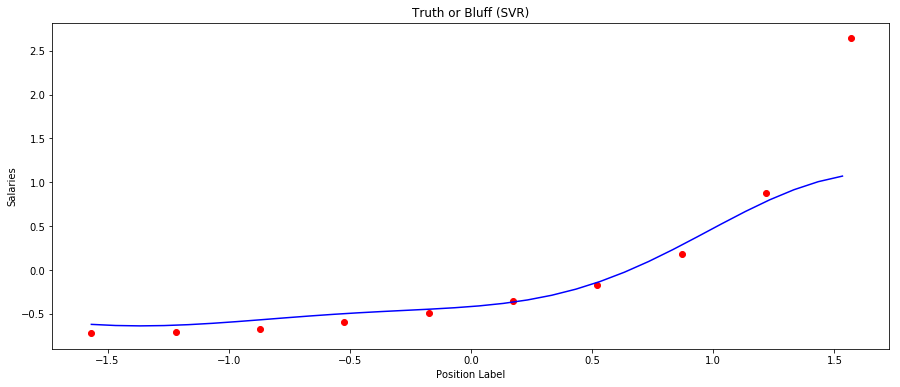

In [83]:
X_grid =np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color ='blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Label")
plt.ylabel("Salaries")